# Top

In [1]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
from adjustText import adjust_text
import pandas as pd

import special_cases as foo
from special_cases import verboten

FICTION = 0
assert not FICTION, "we don't do that anymore"
CANON = 1
if FICTION:
    fname = 'merged_fiction.csv'
elif not CANON:
    fname = 'merged_nocanon.csv'
else:
    fname = 'merged.csv'
df = pd.read_csv(fname)
first_cols = ['token', 'total']
cols = df.columns.tolist()
reordered = first_cols + [col for col in cols if col not in first_cols]
df = df[reordered]
# (now done in make_df.py)
CENSOR = 0
if CENSOR:
    df = df[~df['token'].isin(verboten)]

## Cats setup

In [2]:
df['cat'] = 'other'

for cat, members in foo.cats.iteritems():
    df.loc[df['token'].isin(members), 'cat'] = cat

In [3]:
print len(df)
df['raw_total'].describe()

4106


count     4106.000000
mean       372.254993
std       1436.633038
min         11.577434
25%         60.000000
50%        107.000000
75%        259.000000
max      59666.000000
Name: raw_total, dtype: float64

In [4]:
df.head()

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat
0,limited,23.807825,6.550528,1909,2007,1944.177306,1933,1933,64.0,23.267966,0.539858,0.000000,2.296236,other
1,ladybird,35.255113,4.061507,1867,2008,1924.619098,1913,1895,70.0,18.879785,0.887874,15.487454,0.818364,other
2,mackerel,135.513190,12.080892,1817,2008,1877.224364,1873,1839,141.0,31.377294,1.500691,102.635205,6.581222,other
3,dynamic,35.401447,3.563590,1967,2008,1995.149119,1997,1997,339.0,21.831422,13.570025,0.000000,0.684592,other
4,given sand,25.831622,3.170043,1908,2006,1933.767723,1936,1938,41.0,25.766307,0.065315,0.000000,0.536721,other


In [5]:
rows_per_token = df.groupby('token').size()
rpt = rows_per_token
rpt[rpt > 1]

Series([], dtype: int64)

# Distribution of counts

In [6]:
df['total'].describe([.25, .5, .75, .9, .95, .99, .995])

count     4106.000000
mean       195.454757
std       1245.729398
min          1.590111
25%         15.073748
50%         34.865057
75%         99.065340
90%        281.491712
95%        638.185194
99%       2896.966629
99.5%     4672.406224
max      57504.559155
Name: total, dtype: float64

Top 10 have > 10k

Top ~40 have count > 5k

Top ~400 have > 700

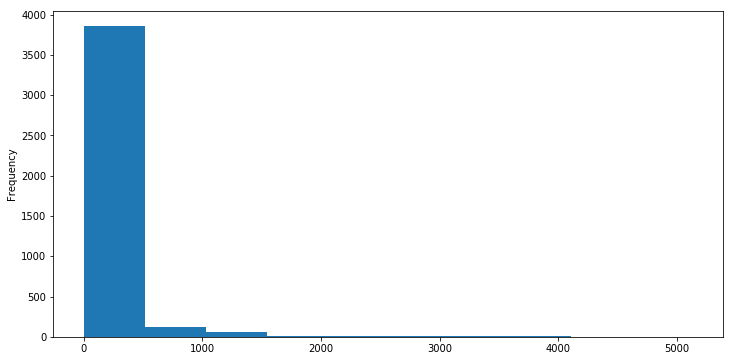

In [7]:
FS = (12, 6)
counts = df['total']
ax = counts[counts < 5200]\
    .plot.hist(figsize=FS);

# Top tokens

In [8]:
df = df.sort_values(by='total', ascending=False)
df['rank'] = range(1, len(df)+1)

In [9]:
from IPython.display import display
with pd.option_context('display.max_rows', None):
    x = df.sort_values(by='total', ascending=False).head(100)
    x = x.copy()
    #x['rank'] = range(1, len(x)+1)
    cols = ['rank', 'token', 'total', 'raw_total', 'mean_yr', 'median_yr', 'mode_yr', 'total_pre1900', 
            'total_20c', 'total_21c', 'cat']
    display(
        x[cols]
    )

,rank,token,total,raw_total,mean_yr,median_yr,mode_yr,total_pre1900,total_20c,total_21c,cat
1051,1,pea,57504.559155,59666.000000,1879.075261,1877,1832,39256.908618,17746.984514,500.666023,vegetables
3730,2,walnut,28001.654140,30892.000000,1877.768596,1875,1868,19511.811493,8144.620748,345.221899,nuts
3589,3,pinhead,19416.662316,24728.000000,1892.950102,1891,1883,11123.559362,8080.622647,212.480307,other
2317,4,egg,14678.359841,18066.000000,1878.966398,1875,1803,9913.194923,4510.820854,254.344064,eggs
3358,5,orange,13909.438587,16375.000000,1882.138586,1877,1832,9532.023004,4190.703915,186.711668,fruit
3362,6,hen's egg,13685.549804,12987.000000,1876.785088,1875,1881,9684.197859,3918.596853,82.755092,other
408,7,hazelnut,12652.848533,11334.000000,1873.955183,1874,1816,9289.799317,3291.922686,71.126530,nuts
3144,8,pigeon's egg,9636.480664,7709.000000,1865.522415,1861,1832,7658.877413,1927.608275,49.994976,other
2480,9,shilling,8864.612530,6655.000000,1863.158036,1861,1814,7440.437830,1377.988483,46.186216,coins
561,10,nut,8801.896775,6769.000000,1863.206558,1859,1843,7249.807833,1505.700787,46.388155,other


## Top tokens (raw counts)

In [10]:
n = 25
with pd.option_context('display.max_rows', None):
    x = df.sort_values(by='raw_total', ascending=False).head(n)
    x = x.copy()
    x['rank'] = range(1, len(x)+1)
    cols = ['rank', 'token', 'total', 'raw_total', 'mean_yr', 'median_yr', 'mode_yr', 'total_pre1900', 
            'total_20c', 'total_21c', 'cat']
    display(
        x[cols]
    )

,rank,token,total,raw_total,mean_yr,median_yr,mode_yr,total_pre1900,total_20c,total_21c,cat
1051,1,pea,57504.559155,59666.0,1879.075261,1877,1832,39256.908618,17746.984514,500.666023,vegetables
3730,2,walnut,28001.654140,30892.0,1877.768596,1875,1868,19511.811493,8144.620748,345.221899,nuts
3589,3,pinhead,19416.662316,24728.0,1892.950102,1891,1883,11123.559362,8080.622647,212.480307,other
2317,4,egg,14678.359841,18066.0,1878.966398,1875,1803,9913.194923,4510.820854,254.344064,eggs
3358,5,orange,13909.438587,16375.0,1882.138586,1877,1832,9532.023004,4190.703915,186.711668,fruit
3362,6,hen's egg,13685.549804,12987.0,1876.785088,1875,1881,9684.197859,3918.596853,82.755092,other
1253,7,man,7255.005822,12046.0,1888.304510,1883,1807,4197.000005,2841.139390,216.866427,other
3965,8,quarter,2981.986487,11414.0,1935.571813,1943,1833,782.136810,1874.131232,325.718445,coins
408,9,hazelnut,12652.848533,11334.0,1873.955183,1874,1816,9289.799317,3291.922686,71.126530,nuts
2391,10,fist,5204.300728,10949.0,1907.049857,1904,1805,2416.577002,2574.639226,213.084500,body_parts


## Bar

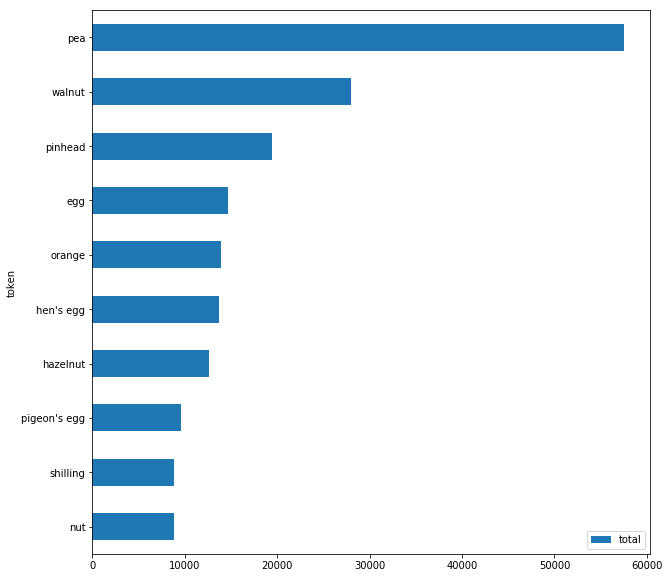

In [11]:
n = 10
FS = (10, 10)
df\
    .sort_values(by='total', ascending=False).head(n)\
    .sort_values(by='total')\
    .plot.barh(x='token', y='total', figsize=FS);

## Top tokens < 1900

In [12]:
n = 22
tops = []
x = df.sort_values(by='total', ascending=False).head(n)
tops.append(x['token'])

In [13]:
x = df.sort_values(by='total_pre1900', ascending=False).head(n)
tops.append(x['token'])
x

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1051,pea,57504.559155,1960.629646,1800,2008,1879.075261,1877,1832,59666.0,17746.984514,500.666023,39256.908618,38752.807156,vegetables,1
3730,walnut,28001.654140,363.410457,1800,2008,1877.768596,1875,1868,30892.0,8144.620748,345.221899,19511.811493,6977.516192,nuts,2
3589,pinhead,19416.662316,258.009882,1800,2008,1892.950102,1891,1883,24728.0,8080.622647,212.480307,11123.559362,3378.692360,other,3
2317,egg,14678.359841,211.186702,1800,2008,1878.966398,1875,1803,18066.0,4510.820854,254.344064,9913.194923,1777.074272,eggs,4
3362,hen's egg,13685.549804,202.722873,1800,2008,1876.785088,1875,1881,12987.0,3918.596853,82.755092,9684.197859,2034.550771,other,6
3358,orange,13909.438587,229.164504,1801,2008,1882.138586,1877,1832,16375.0,4190.703915,186.711668,9532.023004,2179.014709,fruit,5
408,hazelnut,12652.848533,210.445739,1801,2008,1873.955183,1874,1816,11334.0,3291.922686,71.126530,9289.799317,2290.362563,nuts,7
3144,pigeon's egg,9636.480664,225.981664,1800,2008,1865.522415,1861,1832,7709.0,1927.608275,49.994976,7658.877413,1469.205194,other,8
2480,shilling,8864.612530,231.534130,1800,2008,1863.158036,1861,1814,6655.0,1377.988483,46.186216,7440.437830,1652.426234,coins,9
561,nut,8801.896775,193.005554,1800,2008,1863.206558,1859,1843,6769.0,1505.700787,46.388155,7249.807833,1397.907809,other,10


## Top tokens 20th century

In [14]:
x = df.sort_values(by='total_20c', ascending=False).head(n)
tops.append(x['token'])
x

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1051,pea,57504.559155,1960.629646,1800,2008,1879.075261,1877,1832,59666.0,17746.984514,500.666023,39256.908618,38752.807156,vegetables,1
3730,walnut,28001.654140,363.410457,1800,2008,1877.768596,1875,1868,30892.0,8144.620748,345.221899,19511.811493,6977.516192,nuts,2
3589,pinhead,19416.662316,258.009882,1800,2008,1892.950102,1891,1883,24728.0,8080.622647,212.480307,11123.559362,3378.692360,other,3
2317,egg,14678.359841,211.186702,1800,2008,1878.966398,1875,1803,18066.0,4510.820854,254.344064,9913.194923,1777.074272,eggs,4
3358,orange,13909.438587,229.164504,1801,2008,1882.138586,1877,1832,16375.0,4190.703915,186.711668,9532.023004,2179.014709,fruit,5
3362,hen's egg,13685.549804,202.722873,1800,2008,1876.785088,1875,1881,12987.0,3918.596853,82.755092,9684.197859,2034.550771,other,6
408,hazelnut,12652.848533,210.445739,1801,2008,1873.955183,1874,1816,11334.0,3291.922686,71.126530,9289.799317,2290.362563,nuts,7
1253,man,7255.005822,170.668413,1800,2008,1888.304510,1883,1807,12046.0,2841.139390,216.866427,4197.000005,333.744732,other,14
2391,fist,5204.300728,78.036806,1803,2008,1907.049857,1904,1805,10949.0,2574.639226,213.084500,2416.577002,244.086964,body_parts,18
3621,bean,8212.771434,157.401069,1800,2008,1878.103095,1878,1844,8119.0,2456.496913,56.280380,5699.994141,967.408470,vegetables,11


## Top tokens 21st century

In [15]:
x = df.sort_values(by='total_21c', ascending=False).head(n)
tops.append(x['token'])
x

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1051,pea,57504.559155,1960.629646,1800,2008,1879.075261,1877,1832,59666.0,17746.984514,500.666023,39256.908618,38752.807156,vegetables,1
3730,walnut,28001.654140,363.410457,1800,2008,1877.768596,1875,1868,30892.0,8144.620748,345.221899,19511.811493,6977.516192,nuts,2
3965,quarter,2981.986487,51.539531,1804,2008,1935.571813,1943,1833,11414.0,1874.131232,325.718445,782.136810,87.412756,coins,40
2109,football field,1136.335178,36.384901,1903,2008,1984.441675,1990,2003,8594.0,849.035063,287.300115,0.000000,119.123679,other_sports,111
2317,egg,14678.359841,211.186702,1800,2008,1878.966398,1875,1803,18066.0,4510.820854,254.344064,9913.194923,1777.074272,eggs,4
2852,grapefruit,1211.235877,30.736712,1909,2008,1975.571244,1981,2004,7509.0,970.628855,240.607022,0.000000,60.259162,fruit,99
2385,house,3071.643279,44.673050,1803,2008,1922.875186,1931,1831,9472.0,1746.606813,238.168257,1086.868208,55.557874,other,39
1599,golf ball,1385.582973,29.676002,1894,2008,1968.601576,1973,1940,7503.0,1156.167538,222.484575,6.930861,50.943241,other,82
1253,man,7255.005822,170.668413,1800,2008,1888.304510,1883,1807,12046.0,2841.139390,216.866427,4197.000005,333.744732,other,14
2391,fist,5204.300728,78.036806,1803,2008,1907.049857,1904,1805,10949.0,2574.639226,213.084500,2416.577002,244.086964,body_parts,18


## Summary leaderboard

In [16]:
import numpy as np
tops = np.array(tops)
cols = ['pre_1900', '20c', '21c']
lboard = pd.DataFrame(tops[1:].T, columns=cols)
lboard

,pre_1900,20c,21c
0,pea,pea,pea
1,walnut,walnut,walnut
2,pinhead,pinhead,quarter
3,egg,egg,football field
4,hen's egg,orange,egg
5,orange,hen's egg,grapefruit
6,hazelnut,hazelnut,house
7,pigeon's egg,man,golf ball
8,shilling,fist,man
9,nut,bean,fist


# Oldest

In [17]:
df.sort_values(by='median_yr', ascending=True).head(10)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
417,freckle,50.760142,28.254811,1800,2008,1847.556145,1800,1800,94.0,7.395226,3.176244,40.188672,24.317347,other,1665
37,vast,43.192682,27.961564,1801,2007,1844.480019,1801,1801,42.0,8.370599,0.985907,33.836176,31.555576,other,1804
3541,mid,17.326103,10.445828,1802,2008,1872.329126,1802,1802,62.0,3.716231,3.164044,10.445828,4.748946,other,2911
2776,mote,50.761523,18.641043,1801,2008,1869.738640,1802,1801,88.0,20.277733,1.396919,29.086871,10.151985,other,1664
4058,pit,19.026673,10.445828,1802,2008,1885.170901,1802,1802,70.0,5.734800,2.846045,10.445828,3.458547,other,2802
190,dolphin,27.934893,20.891657,1802,2008,1849.482493,1802,1802,65.0,4.843533,2.199704,20.891657,17.641018,other,2328
3681,keg,31.159766,19.198791,1803,2008,1855.940049,1803,1803,53.0,7.871914,1.300440,21.987412,11.286191,other,2193
2650,Fox,211.424466,70.637028,1800,2008,1834.292711,1804,1800,88.0,14.602819,0.453855,196.367791,102.843751,other,522
1642,bureau,61.485898,34.683025,1805,2008,1855.791535,1805,1805,94.0,16.721147,1.046093,43.718659,35.151310,other,1451
3635,nightingale,65.700657,26.303813,1804,2008,1836.612641,1806,1804,41.0,7.551251,0.695057,57.454349,32.625254,other,1392


Glossary:
- primmer: "A prayer book or devotional manual for the use of lay people." or "An elementary school-book for teaching children to read.". (OED). Seems v rare - not in any other online dictionaries
- capon: a castrated domestic cock fattened for eating.
- curlew: a large wading bird of the sandpiper family, with a long down-curved bill, brown streaked plumage, and frequently a distinctive ascending two-note call

In [18]:
df[df['total']>200].sort_values(by='median_yr', ascending=True).head(15)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
2650,Fox,211.424466,70.637028,1800,2008,1834.292711,1804,1800,88.0,14.602819,0.453855,196.367791,102.843751,other,522
3368,Cat,333.107390,127.146650,1800,2006,1828.903066,1807,1800,113.0,24.404488,0.218740,308.484162,328.119130,other,350
1318,Blackbird,227.953486,41.783313,1802,2008,1839.102307,1812,1802,119.0,17.783499,0.985394,209.184593,51.562004,other,491
144,walking staff,262.822135,35.071751,1801,2008,1844.676756,1812,1804,166.0,54.639515,1.139450,207.043170,37.389632,other,433
2020,hazle,660.541444,124.122482,1801,2008,1820.863260,1814,1807,185.0,5.217635,0.994757,654.329052,327.400929,other,199
2343,heron,219.979159,36.255008,1803,2008,1830.975035,1814,1809,99.0,15.472903,0.792584,203.713672,55.680572,other,504
3278,native,281.188375,37.282085,1801,2008,1843.644172,1814,1801,190.0,46.553403,1.994965,232.640007,41.698538,other,412
1661,tun,339.731664,37.282085,1800,2008,1843.173788,1814,1801,194.0,31.438039,1.141414,307.152212,51.333276,other,344
2177,heifer,244.035472,36.255008,1800,2008,1830.765540,1815,1809,119.0,17.675582,1.057259,225.302630,43.575345,other,466
3909,chick,233.223558,23.079033,1803,2008,1861.183158,1815,1808,241.0,66.075919,2.692748,164.454890,19.284029,other,480


In [19]:
df[df['total']>200].sort_values(by='mean_yr', ascending=True).head(15)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
2761,tame goose,211.748530,25.374374,1806,2003,1819.988071,1816,1806,51.0,0.387726,0.073357,211.287447,42.705325,other,520
2020,hazle,660.541444,124.122482,1801,2008,1820.863260,1814,1807,185.0,5.217635,0.994757,654.329052,327.400929,other,199
171,chesnut,680.625598,43.327064,1802,2008,1828.538038,1822,1816,238.0,10.213617,1.092516,669.319465,95.381133,other,193
3714,writing quill,288.437066,24.758322,1801,2008,1828.877282,1826,1816,91.0,1.349289,0.281369,286.806407,30.301015,other,403
3368,Cat,333.107390,127.146650,1800,2006,1828.903066,1807,1800,113.0,24.404488,0.218740,308.484162,328.119130,other,350
2177,heifer,244.035472,36.255008,1800,2008,1830.765540,1815,1809,119.0,17.675582,1.057259,225.302630,43.575345,other,466
2343,heron,219.979159,36.255008,1803,2008,1830.975035,1814,1809,99.0,15.472903,0.792584,203.713672,55.680572,other,504
2922,lark,1164.438505,187.145312,1802,2008,1834.266180,1821,1821,503.0,57.486536,3.680566,1103.271403,352.937986,other,107
2650,Fox,211.424466,70.637028,1800,2008,1834.292711,1804,1800,88.0,14.602819,0.453855,196.367791,102.843751,other,522
1484,episcopal,237.850193,26.303813,1802,2008,1835.657304,1820,1804,115.0,24.862498,0.779745,212.207950,31.972871,other,473


Sorting on mean and median year give pretty similar results. I think median is probably a better metric in this case. It's easy to get artifical outliers from very old books with very recent reprints.

In [20]:
# Terms with the earliest years in which they were most frequently used.
df[df['total']>200].sort_values(by='mode_yr', ascending=True).head(15)
# (probably sensitive to rare-ish terms appearing multiple times in one very old
# book, esp. if that book has many contemporaraneous editions)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1191,cat,4945.601794,381.439951,1800,2008,1860.775403,1839,1800,5091.000,1117.381706,85.992531,3742.227557,1304.496121,animals,21
3017,dog,2716.119280,70.637028,1800,2008,1882.498041,1863,1800,5130.000,955.582894,118.970642,1641.565744,125.602482,animals,45
835,fox,2450.200092,98.891839,1800,2008,1878.238336,1881,1800,2900.000,908.684617,31.894406,1509.621068,153.081637,other,50
445,-,630.203635,28.254811,1800,2008,1920.091972,1936,1800,2045.000,332.242864,53.232413,244.728359,9.615687,other,209
2747,boy,714.098858,70.637028,1800,2008,1877.450239,1873,1800,974.000,206.625971,16.435710,491.037177,52.609559,other,183
3751,penny,2038.492070,56.509622,1800,2008,1900.467477,1895,1800,3649.000,893.422308,62.733424,1082.336338,52.320410,coins,55
1945,ox,1947.078116,84.764434,1800,2008,1854.219916,1836,1800,1642.000,318.984496,20.113831,1607.979789,175.385711,other,57
3806,inch,771.214049,42.382217,1800,2008,1856.984647,1847,1800,568.000,134.547550,4.733954,631.932545,39.688355,other,170
1423,sheep,1780.531395,42.382217,1800,2008,1885.686562,1888,1800,2254.000,706.737482,26.267232,1047.526681,57.817994,other,62
1264,grain of wheat,350.626424,10.595554,1800,2008,1899.177036,1897,1800,643.657,161.372289,10.034249,179.219885,2.756068,other,334


## Among common terms (top ~10%)

In [21]:
freq = df['total'].quantile(.9)
df[df['total']>freq].sort_values(by='median_yr', ascending=True).head(35)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
3368,Cat,333.107390,127.146650,1800,2006,1828.903066,1807,1800,113.0,24.404488,0.218740,308.484162,328.119130,other,350
1661,tun,339.731664,37.282085,1800,2008,1843.173788,1814,1801,194.0,31.438039,1.141414,307.152212,51.333276,other,344
2020,hazle,660.541444,124.122482,1801,2008,1820.863260,1814,1807,185.0,5.217635,0.994757,654.329052,327.400929,other,199
3851,oak,655.176874,32.890750,1800,2008,1835.785932,1821,1817,379.0,39.433663,5.726873,610.016339,48.385742,other,202
2922,lark,1164.438505,187.145312,1802,2008,1834.266180,1821,1821,503.0,57.486536,3.680566,1103.271403,352.937986,other,107
171,chesnut,680.625598,43.327064,1802,2008,1828.538038,1822,1816,238.0,10.213617,1.092516,669.319465,95.381133,other,193
3054,shrub,897.014093,76.745084,1802,2008,1841.233738,1825,1817,542.0,79.639772,6.796292,810.578028,100.166069,other,142
3883,raven,684.134492,49.336126,1803,2008,1844.530280,1825,1817,472.0,85.294733,6.543858,592.295902,73.087766,other,191
395,kid,318.675797,31.377342,1801,2008,1846.382602,1825,1825,253.0,43.526947,4.089488,271.059362,47.890620,other,367
3714,writing quill,288.437066,24.758322,1801,2008,1828.877282,1826,1816,91.0,1.349289,0.281369,286.806407,30.301015,other,403


- pullet: a young hen, especially one less than one year old.
- filbert: a cultivated hazel tree that bears edible oval nuts. the nut of the filbert tree.

In [22]:
df[df['total']>5000].sort_values(by='median_yr', ascending=True).head(15)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
2402,pigeon,5691.668968,341.264981,1800,2008,1854.613694,1835,1821,4290.0,987.610157,42.762158,4661.296652,1376.122071,animals,16
1345,goose,5130.352380,154.119669,1800,2008,1856.438728,1852,1821,3560.0,676.749048,26.398143,4427.205190,621.819449,other,19
20,sixpence,5941.218140,138.254578,1800,2008,1861.244288,1857,1813,4230.0,922.063031,25.175475,4993.979634,789.561021,coins,15
561,nut,8801.896775,193.005554,1800,2008,1863.206558,1859,1843,6769.0,1505.700787,46.388155,7249.807833,1397.907809,other,10
3144,pigeon's egg,9636.480664,225.981664,1800,2008,1865.522415,1861,1832,7709.0,1927.608275,49.994976,7658.877413,1469.205194,other,8
2480,shilling,8864.612530,231.534130,1800,2008,1863.158036,1861,1814,6655.0,1377.988483,46.186216,7440.437830,1652.426234,coins,9
3194,apple,7887.983206,238.713025,1800,2008,1875.573441,1870,1832,9106.0,2148.103617,128.106936,5611.772653,858.310384,fruit,12
774,cherry,7867.003816,636.568067,1800,2008,1872.381844,1870,1832,7200.0,2109.957215,50.901477,5706.145124,2407.877534,fruit,13
4049,pin,5689.107752,110.819949,1800,2008,1874.197833,1872,1857,5318.0,1548.822704,36.741337,4103.543712,399.832216,other,17
408,hazelnut,12652.848533,210.445739,1801,2008,1873.955183,1874,1816,11334.0,3291.922686,71.126530,9289.799317,2290.362563,nuts,7


# Newest

In [23]:
df.sort_values(by='median_yr', ascending=False).head(10)
# pica: a unit of type size and line length equal to 12 points (about 1/6 inch or 4.2 mm).

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1307,SUV,5.285748,1.020024,1995,2008,2004.758891,2005,2004,80.0,0.220856,5.064892,0.0,0.108198,other,4026
2707,Wal,3.721479,0.831878,1987,2008,2003.501045,2005,2005,52.0,0.368505,3.352974,0.0,0.046251,other,4099
876,DVD,3.852417,0.762555,1999,2008,2004.518968,2005,2005,57.0,0.100028,3.752389,0.0,0.045031,other,4092
2888,family car,3.795566,0.544013,1979,2008,1999.307870,2004,2004,46.0,1.213315,2.582250,0.0,0.016400,other,4093
823,MP3,2.854546,0.660210,1999,2008,2004.140077,2004,2003,41.0,0.100028,2.754518,0.0,0.030223,other,4104
3145,3D,5.986484,0.952022,1985,2008,2001.650142,2004,2004,79.0,1.731626,4.254858,0.0,0.063623,other,3969
3323,minivan,12.223166,1.467133,1987,2008,2001.928446,2003,2003,157.0,2.984724,9.238442,0.0,0.176070,other,3331
1781,JPEG,5.350456,1.145437,1995,2008,2002.607258,2003,2001,71.0,0.880237,4.470219,0.0,0.108800,other,4020
2668,TCP,8.051398,1.613846,1991,2008,2001.488644,2003,2003,101.0,1.822686,6.228712,0.0,0.157050,other,3772
1847,fridge,5.324910,0.783776,1988,2008,2002.332084,2003,2006,70.0,1.451010,3.873901,0.0,0.049205,other,4024


In [24]:
df[df['total'] > 200].sort_values(by='median_yr', ascending=False).head(15)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
3527,deck of cards,287.733133,19.409065,1919,2008,1995.413164,1999,2002,3011.0,149.824868,137.908265,0.000000,35.747818,other,406
1677,credit card,325.815158,19.968174,1923,2008,1995.443296,1998,2002,3236.0,195.594510,130.220648,0.000000,40.327509,other,358
2295,softball,277.398080,20.020895,1935,2008,1989.928899,1994,1986,2418.0,185.065966,92.332114,0.000000,17.866137,other,421
1189,car,346.077231,14.620339,1865,2008,1984.361606,1994,2004,2921.0,221.657388,116.148020,8.271823,17.179463,other,340
1251,data,239.087365,11.516995,1957,2008,1991.111576,1992,2003,2015.0,172.234365,66.853000,0.000000,8.587055,other,471
2109,football field,1136.335178,36.384901,1903,2008,1984.441675,1990,2003,8594.0,849.035063,287.300115,0.000000,119.123679,other_sports,111
2427,basketball,618.286322,21.645501,1909,2008,1984.293271,1989,2002,4672.0,451.590477,166.695845,0.000000,32.148494,balls,214
3660,closet,322.450457,11.821159,1831,2008,1971.534076,1989,2002,2269.0,207.937007,83.330424,31.183026,8.927159,other,360
3648,computer,244.160675,11.677793,1946,2008,1987.006121,1987,1984,1769.0,197.847096,46.313578,0.000000,7.954271,other,465
2091,program,276.820356,12.505252,1944,2008,1984.434616,1986,1992,1824.0,242.422903,34.397454,0.000000,9.560903,other,423


## Among top 10%

In [25]:
freq = df['total'].quantile(.9)
df[df['total'] > freq].sort_values(by='median_yr', ascending=False).head(25)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
3527,deck of cards,287.733133,19.409065,1919,2008,1995.413164,1999,2002,3011.0,149.824868,137.908265,0.000000,35.747818,other,406
1677,credit card,325.815158,19.968174,1923,2008,1995.443296,1998,2002,3236.0,195.594510,130.220648,0.000000,40.327509,other,358
1189,car,346.077231,14.620339,1865,2008,1984.361606,1994,2004,2921.0,221.657388,116.148020,8.271823,17.179463,other,340
2109,football field,1136.335178,36.384901,1903,2008,1984.441675,1990,2003,8594.0,849.035063,287.300115,0.000000,119.123679,other_sports,111
3660,closet,322.450457,11.821159,1831,2008,1971.534076,1989,2002,2269.0,207.937007,83.330424,31.183026,8.927159,other,360
2427,basketball,618.286322,21.645501,1909,2008,1984.293271,1989,2002,4672.0,451.590477,166.695845,0.000000,32.148494,balls,214
2774,pack,299.806916,10.537127,1837,2008,1971.963957,1985,2005,1988.0,206.541002,68.977182,24.288733,5.712045,other,395
2884,suitcase,291.835994,8.678527,1912,2008,1975.748738,1983,1982,1846.0,235.315094,56.520900,0.000000,4.095803,other,402
1300,window,731.664620,35.236974,1803,2008,1939.103460,1983,1993,3725.0,433.481013,89.332778,208.850829,47.413320,other,181
1068,fingernail,395.826321,14.852972,1825,2008,1966.365628,1983,1983,2335.0,299.191572,64.762451,31.872298,9.387637,other,295


# Cats

In [26]:
#cols = [col for col in df.columns if col.startswith('total')]
cols = ['total_pre1900', 'total_20c', 'total_21c', 'total']
x = df.groupby('cat')[cols].sum()

# for each cat, and era, what % of instances from that era are of that cat
100 * x / x.sum()

,total_pre1900,total_20c,total_21c,total
cat,,,,
animals,2.939871,1.182855,1.104310,2.168066
balls,0.023294,0.883969,1.819948,0.434870
body_parts,0.634711,1.125876,1.026735,0.845944
coins,4.346011,3.177200,2.988245,3.827484
eggs,2.196363,1.404236,0.848899,1.828994
fruit,5.044219,3.323478,2.230101,4.250401
nuts,6.939634,3.888229,1.584927,5.518345
other,67.915268,78.460429,85.579077,72.795608
other_sports,0.000000,0.264308,0.958893,0.141593


# Scattering

In [27]:
toks = set(tops.flatten())
bus = df[df['token'].isin(toks)].copy()

sizes = {
    1 : {'millet seed', 'pinhead'},
    2 : {'pea', 'bean', 'dime', 'pin'},
    2.2 : {'nutmeg',},
    3 : {'crown piece', 'sixpence', 'quarter', 'postage stamp', 'nut', 'shilling', 'sixpence', 'silver dollar',
        'marble'},
    3.5:{'walnut', 'hazelnut', 'cherry'},
    4 : {'golf ball', "pigeon's egg", "credit card"},
    5 : {'egg', 'pencil', 'lead pencil', "hen's egg"},
    5.5: {'apple', 'deck of cards', },
    6: {'orange', 'tennis ball'},
    6.5: {'baseball'},
    7: {'fist', 'grapefruit'},
    8 : {'pigeon'},
    9: {'football', 'basketball'},
    10 : {'cat'},
    10.3: {'goose'},
    10.6: {'man'},
    11: {'house'},
    11.4: {'football field'},
}

bus['size'] = -1
for size, items in sizes.iteritems():
    bus.loc[bus['token'].isin(items), 'size'] = size

24

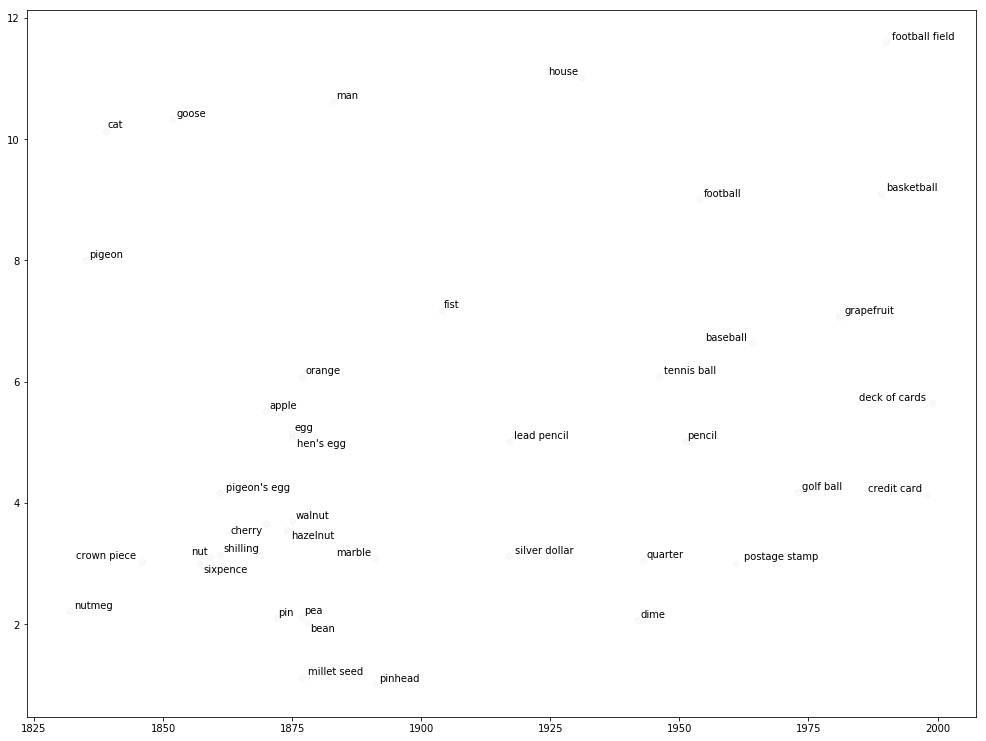

In [28]:
FS = 17, 13
fig, ax = plt.subplots(figsize=FS)
n = 45
# TODO: should probably adjust year biases
if 0:
    sub = df.sort_values(by='total', ascending=False).head(n)
elif 0:
    toks = set(tops.flatten())
    sub = df[df['token'].isin(toks)]
else:
    sub = bus
ordinal_y = 0
randy = 0
sizey = 1
np.random.seed(1338)
if ordinal_y:
    sub = sub.sort_values(by='total', ascending=True)
    y = range(1, len(sub)+1)
elif randy:
    y = np.random.rand(len(sub))
elif sizey:
    y = bus['size'] + .2 * np.random.rand(len(bus))
else:
    y = sub['total']
yrcol = 'median_yr'
x = sub[yrcol]
ax.scatter(x, y, alpha=0.03)

txts = []
#for row in sub.itertuples():
for x_, y_, token in zip(x, y, sub['token']):
    #ax.axvline(x_, alpha=.2)
    t = ax.text(x_, y_, token,
                ha='center', va='top',
               )
    txts.append(t)
#ax.axhline(.5, lw=.5, color='yellow');
for yr in range(1825, 2025, 25):
    break
    ax.axvline(yr, color='red', lw=2, alpha=.7, ls=":")
#ax.set_yscale('log')
#adjust_text(txts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5) );
adjust_text(txts)

In [29]:
len(sub)

40

# Scratch

## totalcounts

In [30]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import pandas as pd
count_fname = 'totalcounts-fiction.txt'
f = open(count_fname)

nugs = f.read().split('\t')
rows = [map(int, nug.split(',')) for nug in nugs if len(nug) > 1]
cols = ['year', 'matches', 'pages', 'books']
cdf = pd.DataFrame(rows, columns=cols)
f.close()

In [31]:
count_fname = 'totalcounts.txt'
f = open(count_fname)

nugs = f.read().split('\t')
rows = [map(int, nug.split(',')) for nug in nugs if len(nug) > 1]
cols = ['year', 'matches', 'pages', 'books']
cdfa = pd.DataFrame(rows, columns=cols)
f.close()

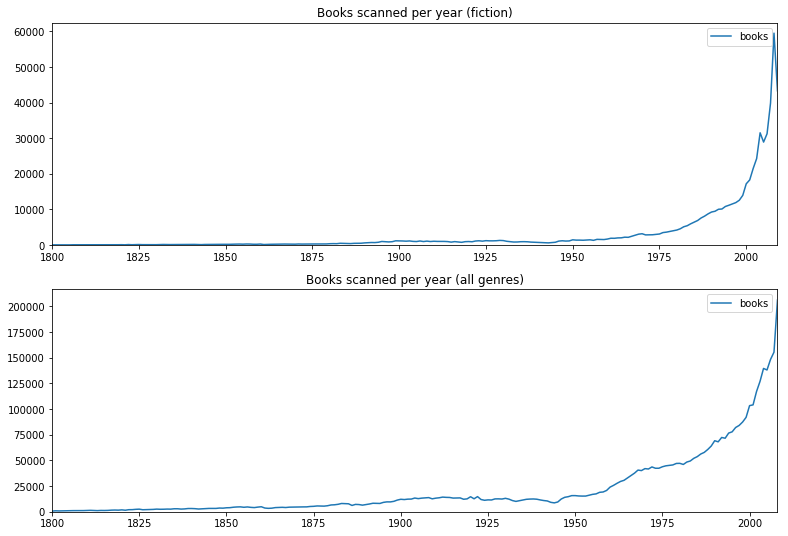

In [32]:
FS = (13, 9)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=FS, sharex=False)
cdf.plot(x='year', y='books', figsize=FS, ax=ax1)
ax1.set_title('Books scanned per year (fiction)')
cdfa.plot(x='year', y='books', figsize=FS, ax=ax2)
ax2.set_title('Books scanned per year (all genres)')

for ax in [ax1, ax2]:
    ax.set_xlim(left=1800)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('')

## Fiction vs. all genres

In [53]:
import matplotlib
matplotlib.get_cachedir()

u'/home/colin/.cache/matplotlib'

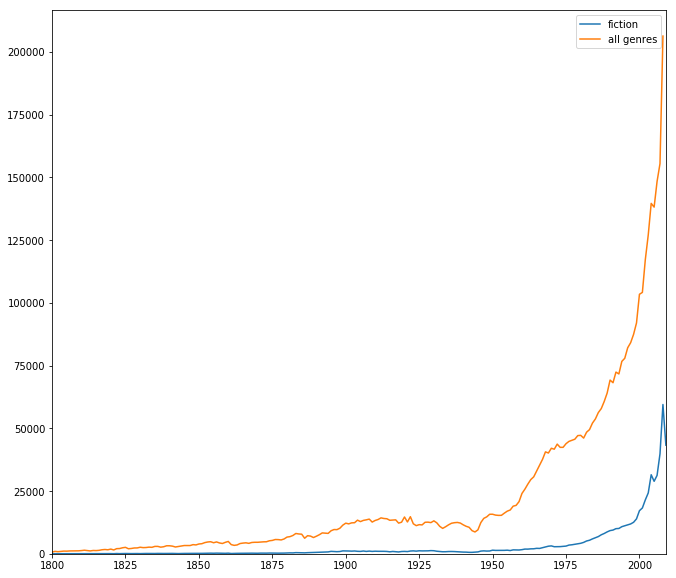

In [52]:
count_fname = 'totalcounts-fiction.txt'
f = open(count_fname)
nugs = f.read().split('\t')
rows = [map(int, nug.split(',')) for nug in nugs if len(nug) > 1]
cols = ['year', 'matches', 'pages', 'books']
cdf = pd.DataFrame(rows, columns=cols)
f.close()


count_fname = 'totalcounts.txt'
f = open(count_fname)
nugs = f.read().split('\t')
rows = [map(int, nug.split(',')) for nug in nugs if len(nug) > 1]
cols = ['year', 'matches', 'pages', 'books']
cdfa = pd.DataFrame(rows, columns=cols)
f.close()


FS = (11, 10)
fig, ax = plt.subplots(figsize=FS)
ax.plot(cdf['year'], cdf['books'], label='fiction')
ax.plot(cdfa['year'], cdfa['books'], label='all genres')
ax.set_xlim(left=1800, 
            right=cdf['year'].max()
            #right=1900,
           )
ax.set_ylim(bottom=0,)
ax.legend();
#ax.set_xlabel('')

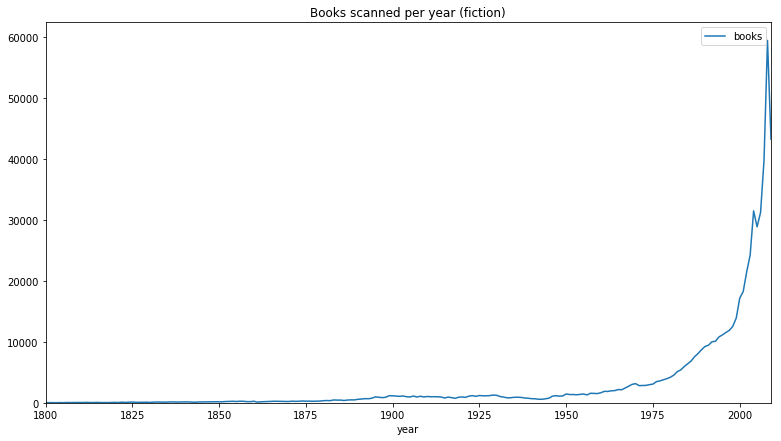

In [34]:
FS = (13, 7)
ax = cdf.plot(x='year', y='books', figsize=FS)
ax.set_title('Books scanned per year (fiction)')
ax.set_xlim(left=1800)
ax.set_ylim(bottom=0);

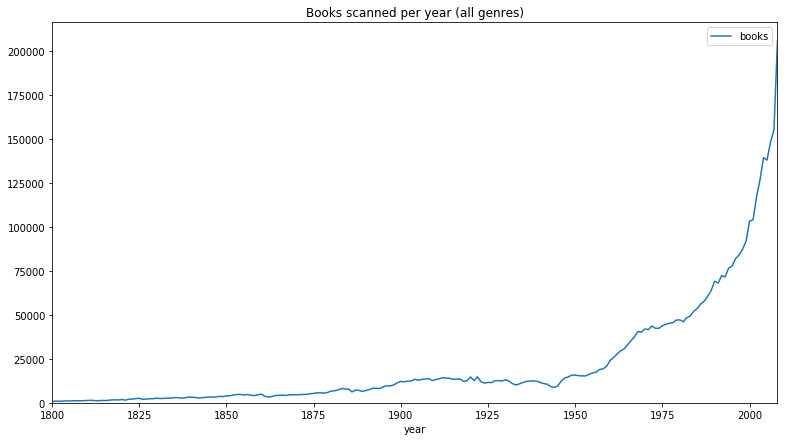

In [35]:
FS = (13, 7)
ax = cdfa.plot(x='year', y='books', figsize=FS)
ax.set_title('Books scanned per year (all genres)')
ax.set_xlim(left=1800)
ax.set_ylim(bottom=0);

In [36]:
#cdf['books'].plot.hist(cumulative=True);
cdf.head()
tups = dict(zip(cdf['year'], cdf['books']))
s = pd.Series(tups)
#x.plot.hist(normed=True, cumulative=True)

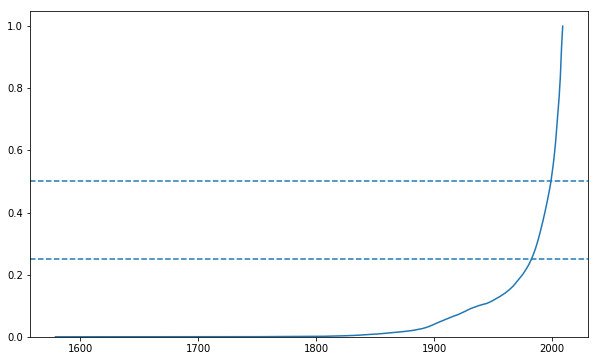

In [37]:
FS = (10, 6)
fig, ax = plt.subplots(figsize=FS)

x = s.index
y = s.cumsum().values
ax.plot(x, y/s.sum())
ax.set_ylim(bottom=0)
ax.axhline(.25, ls='--');
ax.axhline(.5, ls='--');

In [38]:
z = s.cumsum() / s.sum()
z[z > .5].head()

2000    0.526603
2001    0.555595
2002    0.589687
2003    0.628194
2004    0.678196
dtype: float64

## Grepping

In [39]:
df[df['token'].str.match('^pin( |shead|head)')].head(15)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
3589,pinhead,19416.662316,258.009882,1800,2008,1892.950102,1891,1883,24728.0,8080.622647,212.480307,11123.559362,3378.692360,other,3
2139,pin prick,14.820583,0.847886,1906,2008,1954.005162,1959,1940,56.0,13.765647,1.054936,0.000000,0.063849,other,3100


In [40]:
df[df['token'].str.match('^bread')].sort_values(by='total', ascending=False).head(15)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
3420,breadbox,82.951013,3.027587,1914,2008,1978.825664,1988,1992,569.0,64.550377,18.400635,0.0,0.515470,other,1177
1592,bread loaf,5.927699,0.513497,1976,2008,1994.931024,1998,2003,60.0,3.369151,2.558548,0.0,0.013493,other,3975


In [41]:
df[df['token'].str.match('^chest')].head(15)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
2218,chestnut,1891.794727,52.959313,1821,2008,1892.441419,1883,1868,2459.0,601.846639,24.441738,1265.506349,92.827332,other,60
450,chest,57.444640,5.784549,1867,2008,1929.185161,1928,1867,172.0,31.149573,4.314926,21.980141,1.123373,other,1521


In [42]:
if 0:
    x = df.sort_values(by='total', ascending=False)
    with open('sorted_tokens.txt', 'w') as f:
        f.write('\n'.join(x['token']))

In [43]:
df.sort_values(by='annual_max', ascending=False).head(3)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1051,pea,57504.559155,1960.629646,1800,2008,1879.075261,1877,1832,59666.0,17746.984514,500.666023,39256.908618,38752.807156,vegetables,1
774,cherry,7867.003816,636.568067,1800,2008,1872.381844,1870,1832,7200.0,2109.957215,50.901477,5706.145124,2407.877534,fruit,13
3633,nutmeg,4425.229280,429.683445,1800,2008,1838.454272,1832,1832,2161.0,268.790112,17.529600,4138.909568,1714.544814,other,22


In [44]:
df.sort_values(by='total_20c', ascending=False).head(25)

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1051,pea,57504.559155,1960.629646,1800,2008,1879.075261,1877,1832,59666.0,17746.984514,500.666023,39256.908618,38752.807156,vegetables,1
3730,walnut,28001.654140,363.410457,1800,2008,1877.768596,1875,1868,30892.0,8144.620748,345.221899,19511.811493,6977.516192,nuts,2
3589,pinhead,19416.662316,258.009882,1800,2008,1892.950102,1891,1883,24728.0,8080.622647,212.480307,11123.559362,3378.692360,other,3
2317,egg,14678.359841,211.186702,1800,2008,1878.966398,1875,1803,18066.0,4510.820854,254.344064,9913.194923,1777.074272,eggs,4
3358,orange,13909.438587,229.164504,1801,2008,1882.138586,1877,1832,16375.0,4190.703915,186.711668,9532.023004,2179.014709,fruit,5
3362,hen's egg,13685.549804,202.722873,1800,2008,1876.785088,1875,1881,12987.0,3918.596853,82.755092,9684.197859,2034.550771,other,6
408,hazelnut,12652.848533,210.445739,1801,2008,1873.955183,1874,1816,11334.0,3291.922686,71.126530,9289.799317,2290.362563,nuts,7
1253,man,7255.005822,170.668413,1800,2008,1888.304510,1883,1807,12046.0,2841.139390,216.866427,4197.000005,333.744732,other,14
2391,fist,5204.300728,78.036806,1803,2008,1907.049857,1904,1805,10949.0,2574.639226,213.084500,2416.577002,244.086964,body_parts,18
3621,bean,8212.771434,157.401069,1800,2008,1878.103095,1878,1844,8119.0,2456.496913,56.280380,5699.994141,967.408470,vegetables,11


## rect area repro

In [51]:
x = df.sort_values(by='total_20c', ascending=False).head(50).copy()
x['rank'] = range(1,len(x)+1)
x

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank
1051,pea,57504.559155,1960.629646,1800,2008,1879.075261,1877,1832,59666.000000,17746.984514,500.666023,39256.908618,38752.807156,vegetables,1
3730,walnut,28001.654140,363.410457,1800,2008,1877.768596,1875,1868,30892.000000,8144.620748,345.221899,19511.811493,6977.516192,nuts,2
3589,pinhead,19416.662316,258.009882,1800,2008,1892.950102,1891,1883,24728.000000,8080.622647,212.480307,11123.559362,3378.692360,other,3
2317,egg,14678.359841,211.186702,1800,2008,1878.966398,1875,1803,18066.000000,4510.820854,254.344064,9913.194923,1777.074272,eggs,4
3358,orange,13909.438587,229.164504,1801,2008,1882.138586,1877,1832,16375.000000,4190.703915,186.711668,9532.023004,2179.014709,fruit,5
3362,hen's egg,13685.549804,202.722873,1800,2008,1876.785088,1875,1881,12987.000000,3918.596853,82.755092,9684.197859,2034.550771,other,6
408,hazelnut,12652.848533,210.445739,1801,2008,1873.955183,1874,1816,11334.000000,3291.922686,71.126530,9289.799317,2290.362563,nuts,7
1253,man,7255.005822,170.668413,1800,2008,1888.304510,1883,1807,12046.000000,2841.139390,216.866427,4197.000005,333.744732,other,8
2391,fist,5204.300728,78.036806,1803,2008,1907.049857,1904,1805,10949.000000,2574.639226,213.084500,2416.577002,244.086964,body_parts,9
3621,bean,8212.771434,157.401069,1800,2008,1878.103095,1878,1844,8119.000000,2456.496913,56.280380,5699.994141,967.408470,vegetables,10


Real area of bars in first subplot = 18417.7
Real area of bars in 2nd subplot = 21828.4


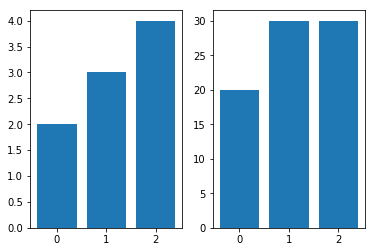

In [45]:
from matplotlib import pyplot as plt
import numpy as np

def get_area(ax, rects):
    area = 0
    for rect in rects:
        bbox = rect.get_bbox()
        bbox_display = ax.transData.transform_bbox(bbox)
        # For some reason, bars going right-to-left will have -ve width.
        rect_area = abs(np.product(bbox_display.size))
        area += rect_area
    return area

fig, (ax1, ax2) = plt.subplots(1,2)

x = range(3)
y1 = [2, 3, 4]
y2 = [20, 30, 30]
r = ax1.bar(x, y1)
print "Real area of bars in first subplot = {:.1f}".format(get_area(ax1, r))
r = ax2.bar(x, y2)
print "Real area of bars in 2nd subplot = {:.1f}".format(get_area(ax2, r))

## Mirrored bars

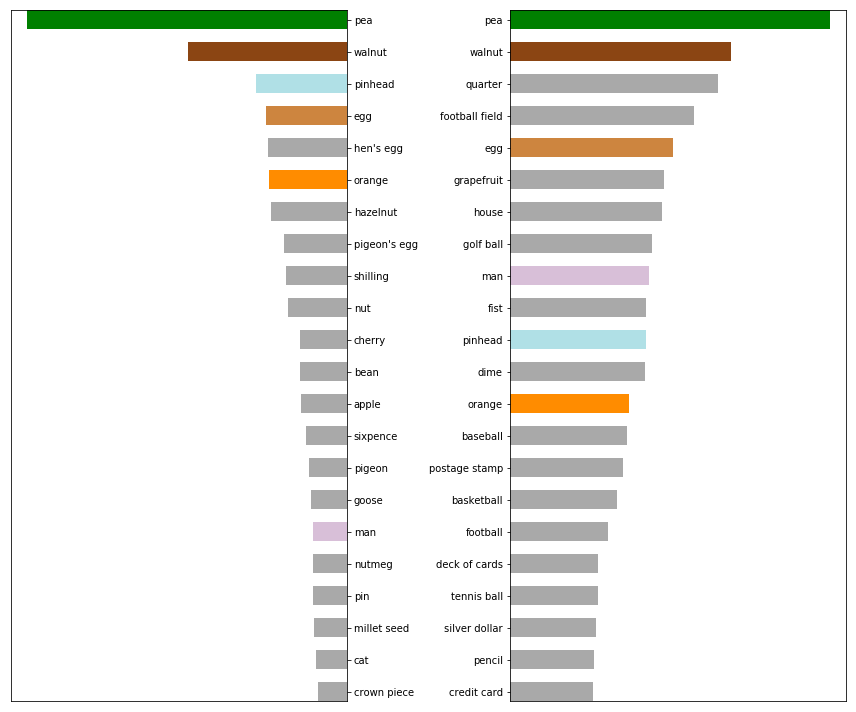

In [46]:
n = 22
FS = (12, 10)
barheight = .6
fig, (ax1, ax2) = plt.subplots(1,2, figsize=FS)
col2 = 'total_21c'
d2 = df\
    .sort_values(by=col2, ascending=False).head(n)\
    .sort_values(by=col2)\
    .copy()
#d2.plot.barh(x='token', y=col, ax=ax2);
    
col1 = 'total_pre1900'
d1 = df\
    .sort_values(by=col1, ascending=False).head(n)\
    .sort_values(by=col1)\
    .copy()
#d1.plot.barh(x='token', y=col, ax=ax1);

dac = [[d1, ax1, col1], [d2, ax2, col2]]

peryear = 0
if peryear:
    nyears = [100, 9]
    for ((d, a, c), ny) in zip(dac, nyears):
        d[c] = d[c] / ny

token_to_color = dict(
    pea = 'g',
    walnut = 'saddlebrown',
    egg = 'peru',
    orange = 'darkorange',
    man = 'thistle',
    pinhead = 'powderblue',
)
defaultcolor = 'darkgrey'
#tokens, colors = zip(token_to_color.items())
for d in [d1, d2]:
    d['color'] = defaultcolor
    for tok, color in token_to_color.items():
        d.loc[d['token']==tok, 'color'] = color

for (d, ax, col) in dac:
    ax.barh(range(n), d[col], barheight, tick_label=d['token'], color=d['color'])
    
#ax1.set_xlim(ax1.get_xlim()[::-1]);
ax1.invert_xaxis();
ax1.yaxis.tick_right()

for ax in [ax1, ax2]:
    ax.set_ylabel('')
    #ax.tick_params(axis='y', which='major', labelsize=8)
    ax.autoscale(axis='y', tight=True)
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
fig.tight_layout();
# TODO: add some meaningful x ticks?
# Could label as % of 'size of a's. In 19th c. pea gets around 7.3% and in 21st c it gets around 1.39%
# TODO 2: maybe increase xlim of ax2, so net effect is moreso that pea is smaller, rather than everything
# else being bigger? i.e. keep the avg. bar height about the same between the two.
# TODO 3: use analogous colors
# TODO 4: maybe just make a second version having x ticks, and keep it up ur sleeve

In [47]:
d1

,token,total,annual_max,first_yr,last_yr,mean_yr,median_yr,mode_yr,raw_total,total_20c,total_21c,total_pre1900,variance,cat,rank,color
3454,crown piece,3922.572981,124.792142,1800,2008,1849.741171,1846,1803,2277.0,341.587253,14.399210,3566.586518,474.357492,coins,27,darkgrey
1191,cat,4945.601794,381.439951,1800,2008,1860.775403,1839,1800,5091.0,1117.381706,85.992531,3742.227557,1304.496121,animals,21,darkgrey
3884,millet seed,5119.360311,127.929900,1800,2008,1876.373035,1877,1883,4229.0,1140.975487,9.791778,3968.593046,653.032790,other,20,darkgrey
4049,pin,5689.107752,110.819949,1800,2008,1874.197833,1872,1857,5318.0,1548.822704,36.741337,4103.543712,399.832216,other,17,darkgrey
3633,nutmeg,4425.229280,429.683445,1800,2008,1838.454272,1832,1832,2161.0,268.790112,17.529600,4138.909568,1714.544814,other,22,darkgrey
1253,man,7255.005822,170.668413,1800,2008,1888.304510,1883,1807,12046.0,2841.139390,216.866427,4197.000005,333.744732,other,14,thistle
1345,goose,5130.352380,154.119669,1800,2008,1856.438728,1852,1821,3560.0,676.749048,26.398143,4427.205190,621.819449,other,19,darkgrey
2402,pigeon,5691.668968,341.264981,1800,2008,1854.613694,1835,1821,4290.0,987.610157,42.762158,4661.296652,1376.122071,animals,16,darkgrey
20,sixpence,5941.218140,138.254578,1800,2008,1861.244288,1857,1813,4230.0,922.063031,25.175475,4993.979634,789.561021,coins,15,darkgrey
3194,apple,7887.983206,238.713025,1800,2008,1875.573441,1870,1832,9106.0,2148.103617,128.106936,5611.772653,858.310384,fruit,12,darkgrey


# BP

## Intro

> Australia or Melanesia is characterized by the great number of its marsupial animals . . . The most remarkable are the Kangaroos (*Macropus*), of which there are several species; the largest are about the size of a sheep
- [Samuel Griswold Goodrich - *Pictorial Geography of the World* (1840)](https://books.google.ca/books?id=6zgWAAAAYAAJ&dq=%22size%20of%20a%22&pg=PA977#v=onepage&q&f=false)

Analogies like this are useful because they describe the unfamiliar (in this case, kangaroos) in terms of the familiar (sheep). But objects that would have been familiar to a general audience in the past may lose their currency after some time, as in this excerpt from instructions for making shotgun pellets ("for fowling"):

> Then take a plate of copper, about the size of a trencher...
- [Thomas Mortimer - *A General Dictionary of Commerce, Trade, and Manufactures*](https://books.google.ca/books?id=FdovAAAAYAAJ&dq=%22size%20of%20a%20trencher%22&pg=PT908#v=onepage&q&f=false)

(A trencher, if you're not familiar, is [a wooden plate or platter for food](https://en.wikipedia.org/wiki/Trencher_(tableware).)

The benchmarks people used for comparisons provide an interesting window into what sorts of objects were on their minds, and what was assumed to be common knowledge at the time.

With the help of [Google Books' Ngram data](https://books.google.com/ngrams), I decided to analyse the changing frequencies in English books of analogies specifically having the form: `the size of a ____`.

## The results

### Most compared to

Here are the top 20 objects that authors compare sizes to, ranked by total number of occurences in books between 1800 and 2008.

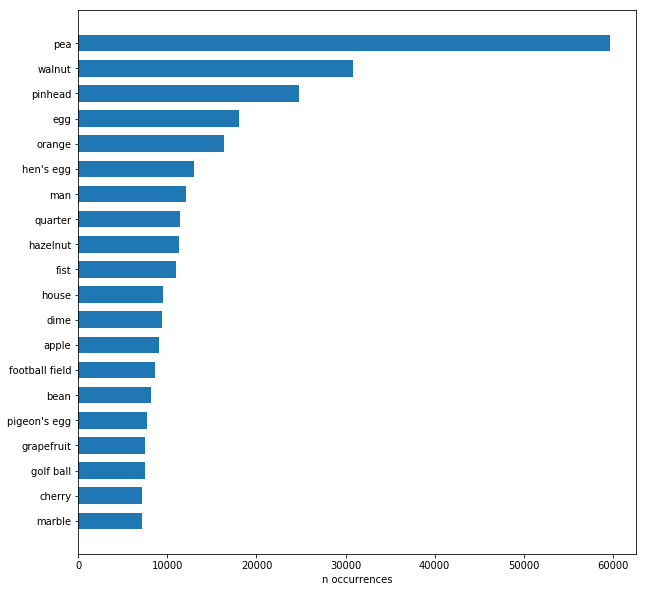

In [48]:
n = 20
FS = (10, 10)
d = df\
    .sort_values(by='raw_total', ascending=False).head(n)\
    .sort_values(by='raw_total')

#d.plot.barh(x='token', y='raw_total', figsize=FS);
fig, ax = plt.subplots(figsize=FS)
barheight = 0.66
ax.barh(range(n), d['raw_total'], barheight, tick_label=d['token'])
ax.set_xlabel('n occurrences');

Peas seem to be the undisputed champion of size analogies.

"the size of a pinhead" is pretty hoary, but other than that, the list is actually pretty short on clichés. That famous chestnut, "the size of a breadbox", doesn't even quite make the top 1000. 

How has this list evolved over time?

Because the number of books published per year has increased over time, this ranking will tend to favour terms that have been popular in recent years, but we can still see a few archaisms, such as "hen's egg".

Let's look at the top terms for the 19th, 20th, and 21st centuries.

### Per century

<!--Here are the 20 objects that authors most frequently use in size comparisons for each of the 19th, 20th, and 21st centuries:-->

In [49]:
cols = ['pre_1900', '20c', '21c']
# [1:] to cut out the 'overall' column
lboard = pd.DataFrame(tops[1:].T, columns=cols, index=range(1, tops.shape[1]+1))
lboard
# TODO: maybe color per term to make dupes more obvious?

,pre_1900,20c,21c
1,pea,pea,pea
2,walnut,walnut,walnut
3,pinhead,pinhead,quarter
4,egg,egg,football field
5,hen's egg,orange,egg
6,orange,hen's egg,grapefruit
7,hazelnut,hazelnut,house
8,pigeon's egg,man,golf ball
9,shilling,fist,man
10,nut,bean,fist


"the size of a pea" is consistently the number 1 size comparison from 1800 to present day. Eggs and walnuts also remain consistently popular, but beyond those examples, there's a lot of change from century to century.

Some differences have obvious historical reasons. For example, the shilling was out of circulation by the dawn of the millenium, and credit cards didn't exist in the 19th century. But most are less obvious. Why have we gradually forgetten how big pigeon eggs are? Why is 'a deck of cards' such a distinctly modern point of reference?

Let's dig into a few specific areas of variation.

### The decline of pigeon eggs

One general trend that stands out is a drop over time in references to 'natural' objects. 16 of the top 20 terms in the 19th century refer to objects from nature (seeds, fruits, animals, nuts, eggs...). In the 20th century that number drops to 11, and in the 21st century there are only 6.

The story of eggs is an interesting example of this trend. Until the mid-to-late 20th century, "the size of a hen's egg" was about as common as "the size of an egg". Perhaps "an egg" left open too much ambiguity. A reader might think you were referring to a pigeon's egg - an astonishingly common reference until its popularity began to drop in the late 19th century.

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+an+egg%2Csize+of+a+pigeon%27s+%2B+size+of+a+pigeon+egg%2Csize+of+a+goose%27s+%2B+size+of+a+goose+egg%2Csize+of+a+hen%27s+%2B+size+of+a+hen+egg&year_start=1800&year_end=2000&corpus=15&smoothing=8&share=&direct_url=t1%3B%2Csize%20of%20an%20egg%3B%2Cc0%3B.t1%3B%2C%28size%20of%20a%20pigeon%20%27s%20%2B%20size%20of%20a%20pigeon%20egg%29%3B%2Cc0%3B.t1%3B%2C%28size%20of%20a%20goose%20%27s%20%2B%20size%20of%20a%20goose%20egg%29%3B%2Cc0%3B.t1%3B%2C%28size%20of%20a%20hen%20%27s%20%2B%20size%20of%20a%20hen%20egg%29%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

### The rise of sports

The most recent top 20 has n terms related to sports (n balls + 'football field'), whereas none make the top 20 in either of the previous centuries. 

Most of the referenced sports weren't invented until around the turn of the century. Even those that existed well before that (e.g. cricket, golf) have relatively few references before 1900.

<!-- It's tempting to connect this to the decline in plants and animals. Blah blah. -->

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+football%2Csize+of+a+baseball%2Csize+of+a+basketball%2Csize+of+a+golf+ball%2Csize+of+a+tennis+ball%2Csize+of+a+cricket+ball&year_start=1800&year_end=2008&corpus=15&smoothing=5&share=&direct_url=t1%3B%2Csize%20of%20a%20football%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20baseball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20basketball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20golf%20ball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20tennis%20ball%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20cricket%20ball%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

### Pencils and lead pencils

"pencil" charts only in the 21st century. It's preceded by the curious "lead pencil" which peaked in popularity in the early 20th century.

<!-- size of a pencil,size of a lead pencil -->
<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+pencil%2Csize+of+a+lead+pencil&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Csize%20of%20a%20pencil%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20lead%20pencil%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

What gives? It turns out that ["pencil"](https://en.wiktionary.org/wiki/pencil#Noun) used to refer to a small, fine paintbrush used for writing. "Lead pencils" were presumably so-named because of their similar appearance and purpose. As lead pencils gained popularity, the name was shortened and the original "pencil" faded from memory.

This is similar to the shift from "hen's egg" to just "egg". As other kinds of eggs/pencils became less relevant, the qualifier was no longer needed.

Interestingly, before the popularization of lead pencils, *goose quills* seemed to fill a similar niche (in reality and in analogies).

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+pencil%2Csize+of+a+lead+pencil%2Csize+of+a+goose+quill&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Csize%20of%20a%20pencil%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20lead%20pencil%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20goose%20quill%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

### The modernity of decks of cards

Here's a graph that I found pretty surprising:

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=deck+of+cards&year_start=1800&year_end=2008&corpus=15&smoothing=5&share=&direct_url=t1%3B%2Cdeck%20of%20cards%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

Playing cards have been around for ages, but referring to them as a 'deck' is a distinctly 20th century (late 20th-century, even) habit. Before that 'pack' was the standard nomenclature:

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=deck+of+cards%2Cpack+of+cards&year_start=1800&year_end=2008&corpus=15&smoothing=5&share=&direct_url=t1%3B%2Cdeck%20of%20cards%3B%2Cc0%3B.t1%3B%2Cpack%20of%20cards%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

[TODO: blah blah shakespeare]()

## Appendix: Methodology

For this analysis I used the most recent English [Google Books ngram data](https://books.google.com/ngrams/datasets). I downloaded all 4-grams and 5-grams beginning with 'si' and grepped for `size of an? *`. I normalized the counts for a phrase in a given year by the total number of scanned words for that year (available via the `total_counts` file).

A few more details are worth mentioning.

<!-- Could talk about normalization woes. Difficulty in getting commensurable numbers across time periods. But prob not that interesting. While there might also mention other gbooks data confounds (changing genre composition, bad year metadata.) -->

### Non-figurative phrases

Sometimes "the size of an X" is an actual object of discussion, e.g.:

> Excessive magnification of the size of an image can make it difficult to recognize what real object it represents.

Fortunately, there is a pretty clean division between objects that are used in those contexts, and objects used for comparison. There are very few discussions on the size of a pea or the size of a pin's head. And images, networks, and families are rarely referenced when making size comparisons.

I manually curated a list of objects that are mostly used non-figuratively, and excluded them from the analysis. Most of them are computer terms (object, image, partition, array...). The only phrase listed in the high-score table above having a non-trivial proportion of non-figurative uses is "house" (my back-of-the-envelope estimate is that around 10% of "size of a house"s are non-figurative).

### Orthographic variations

I merged together the counts for minor orthographic variations of the same phrase. For example, "a pin's head", "a pin head", and "a pinhead". Though not the focus of my analysis, the changes in spelling of a term over time can occasionally be quite dramatic:

<iframe name="ngram_chart" src="https://books.google.com/ngrams/interactive_chart?content=size+of+a+pinhead%2Csize+of+a+pin%27s%2Csize+of+a+pin+head&year_start=1800&year_end=2008&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Csize%20of%20a%20pinhead%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20pin%20%27s%3B%2Cc0%3B.t1%3B%2Csize%20of%20a%20pin%20head%3B%2Cc0" width=900 height=500 marginwidth=0 marginheight=0 hspace=0 vspace=0 frameborder=0 scrolling=no></iframe>

I didn't merge significantly different surface realizations of the same object, e.g. {"an egg", "a hen's egg"}, or {"a hazelnut", "a filbert"}.

I curated a small set of common, innocuous adjectives like "small", "large", "ordinary", "standard". I merged counts for bigrams matching "&lt;adjective&gt; X" into X - e.g. the counts for "the size of an ordinary apple" are counted under "apple".

Without these merging heuristics, the results are not appreciably different. One interesting feature of the ranking of 'raw' terms: such is the primacy of peas that they would appear 3 times in the top 20: 1. pea, 12. small pea, 18. large pea.

### Limitations of 4-grams/5-grams

You may notice that some objects are unigrams (single words like "pea") and some are bigrams (two-word phrases like "football field").

I used 4-gram data ("size of a X") as a starting point and extended the results as necessary using 5-grams ("size of a X Y").

Some tokens were partially extended. For example, "football" followed by any of "field", "pitch", "player", or "stadium" were each treated as distinct objects. The remaining counts for "size of a football" (after subtracting the counts for "size of a football field" etc.) went to the "football" object.

If a token could not stand alone as an object, it was fully split. For example, "the size of a tea" is not a meaningful phrase, so I ignored the count for the "tea" unigram, and separately counted all bigrams beginning with "tea" (tea chests, tea plates, tea saucers, tea trays...).

#### Disambiguation

In some cases, even a bigram couldn't stand alone as a meaningful object - e.g. "deck of". In most cases, there was a single larger phrase that the bigram unambiguously prefixed (e.g. "deck of cards" in the previous example). Where possible, I filled in these completions transparently.

In a few rare cases, the completion was ambiguous. The two most common bigrams with this problem were "grain of" and "man's" (in the Google Books ngram data, this is tokenized as `["man", "'s"]`). I applied a quick hack to patch up these two cases. I looked at 5-grams matching "as a man 's X" and "as a grain of X" to calculate the distribution of completions. I then divided the bigram counts into trigrams according to the distribution of those completions. (e.g. if 50% of X's were "mustard" in "as a grain of X" in 1958, and "size of a grain of" had 800 appearances in 1958, "size of a grain of mustard" would be recorded with 400 appearances in 1958).